# **Task 1 - Machine Learning - Individual 1. Data Acquisition and Exploration**

### Rabbani Nur Kumoro

### 21/472599/PA/20310

### CSB

# **Libraries Used**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.impute import IterativeImputer, SimpleImputer

# **Dataset Informations**

In [3]:
df = pd.read_csv('boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [4]:
df.shape

(9888, 10)

In [4]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


In [5]:
df = pd.read_csv('boat_data.csv')
df.tail(5)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
9883,CHF 4900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116
9884,EUR 4516,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94
9885,EUR 4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354
9886,EUR 4300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266
9887,CHF 3780,Fishing Boat,DarekCo power boats,new boat from stock,2019,3.60,1.60,GRP,Switzerland Â» Brienzersee Â» Brienz,194


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [7]:
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

# temp


In [6]:
df.Location.value_counts()[:5]

Netherlands Â» In verkoophaven    309
Croatia (Hrvatska)                244
Italy Â» Toscana Â» Toscana       173
Italy                             155
France                            152
Name: Location, dtype: int64

In [7]:
df.Manufacturer.value_counts()[:5]

BÃ©nÃ©teau power boats    631
Jeanneau power boats      537
Sunseeker power boats     383
Princess power boats      241
Sea Ray power boats       239
Name: Manufacturer, dtype: int64

In [8]:
df['Boat Type'].value_counts()[:5]


Motor Yacht    2720
Sport Boat     1407
Flybridge      1194
Trawler         679
Pilothouse      613
Name: Boat Type, dtype: int64

In [9]:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

# Is it the most expensive boats that get the most views?



In [9]:
most_viewed = df[df['Number of views last 7 days'] > 700].sort_values('Number of views last 7 days', ascending=False)

In [10]:
most_viewed


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263
8723,CHF 35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland Â» Neuenburgersee Â» Hauterive,2432
6211,CHF 125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland Â» Lago Maggiore Â» 6600 Locarno,2261
3700,EUR 949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt in Holstein (Ostsee),2154
308,CHF 19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland Â» Murtensee Â» Avenches,2026
...,...,...,...,...,...,...,...,...,...,...
9409,CHF 19000,Bowrider,Larson power boats,"Used boat,Unleaded",1998,6.07,2.47,GRP,Switzerland Â» Lake Geneva Â» Port de Founex,709
9569,CHF 15000,Cabin Boat,NaN,"Used boat,Diesel",1985,6.90,2.55,GRP,Switzerland Â» Lake Constance Â» Landschlacht,708
7838,CHF 56500,Cabin Boat,Rinker power boats,"Used boat,Unleaded",2008,7.47,2.59,GRP,Switzerland Â» Lake Geneva Â» Morges,708
8736,CHF 35000,Motor Yacht,Sunseeker power boats,Used boat,1990,9.42,3.30,GRP,Switzerland Â» Ermatingen,706


/var/folders/q5/b18s3s8s2vb1kmp31ystnh8h0000gn/T/ipykernel_93479/4225546040.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax);


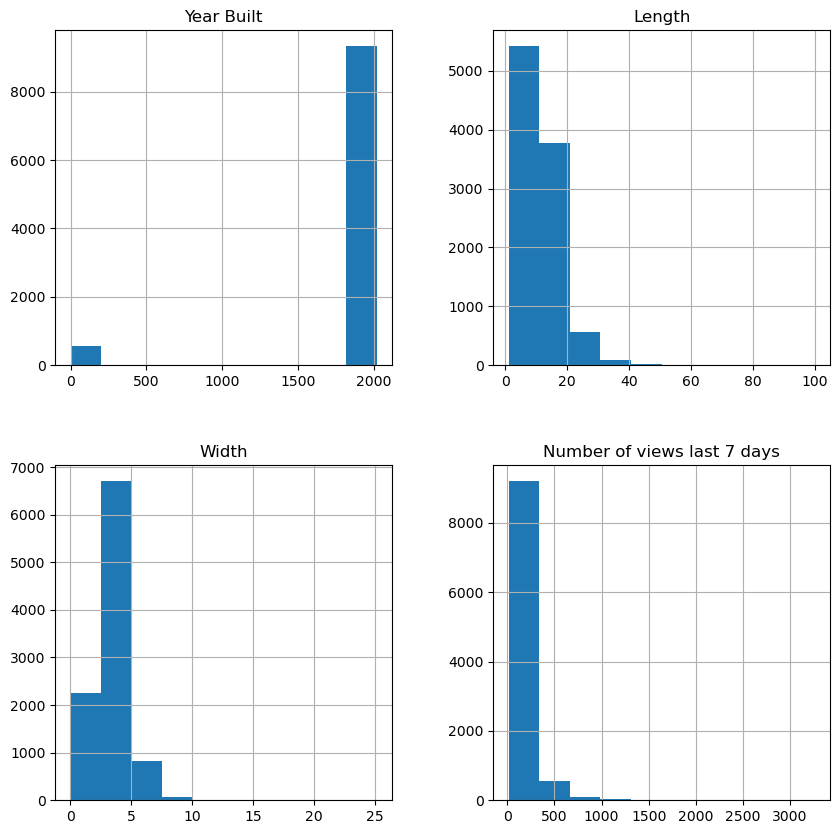

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax=ax);